In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


#### 군집(clustering)
- 비슷한 샘플을 클러스터(cluster)로 모은다. 군집은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분하르 준지도 학습, 차원 축소 등에 사용할 수 있는 훌륭한 도구입니다.

#### 이상치 탐지(outlier detection)
- '정상' 데이터가 어떻게 보이는지를 학습한다. 그 다음 비정상 샘플을 감지하는 데 사용한다 예를 들면 제조 라인에서 결함 제품을 감지하거나 시계열 데이터에서 새로운 트렌드를 찾는다.

#### 밀도 추정(density estimation)
- 데이터셋 생성 확률 과정(random process)의 확률 밀도 함수(probability density function)를 추정한다. 밀도 추정은 이상치 탐지에 널리 사용된다. 밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높다. 또한 데이터 분석과 시각화에도 유용하다.

### 9.1 군집

#### 9.1.1 k-평균

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples = 2000, centers = blob_centers, cluster_std = blob_std, random_state = 7)

In [4]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [5]:
# 5개의 센트로이드(각 클러스터의 중심)
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [6]:
# 샘플에 할당된 클러스터의 인덱스
kmeans.labels_

array([4, 1, 0, ..., 3, 0, 1])

In [7]:
# 새로운 데이터
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3])

In [23]:
# 보로노이 다이어그램 : 평면을 특정 점까지의 거리가 가장 가까운 점의 집합으로 분할한 그림
# 결정경계 그리기

# 점 그리기
def plot_data(X):
    plt.plot(X[:,0], X[:,1], 'k.', markersize = 2)
    
# 센트로이드 표시    
def plot_centroids(centroids, weights = None, circle_color = 'w', cross_color = 'k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:,0], centroids[:,1], marker = 'o', s = 35, linewidths = 8, 
               color = circle_color, zorder = 10, alpha = 0.9)
    plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 2, linewidths = 12, 
               color = cross_color, zorder = 11, alpha = 1)
    

# 결정경계 그리기
def plot_decision_boundaries(clusterer, X, resolution = 1000, show_centroids = True,
                            show_xlabels = True, show_ylabels = True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

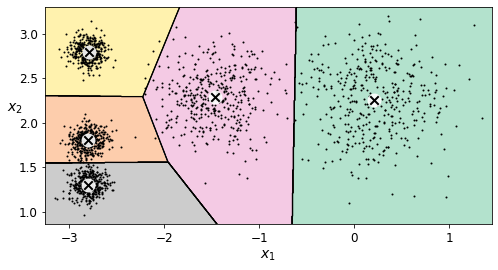

In [9]:
plt.figure(figsize = (8,4))
plot_decision_boundaries(kmeans, X)
plt.show()

실제로 k-means 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않는다. 

- 하드 군집 : 샘플을 하나의 클러스터에 할당한다.
- 소프트 군집 : 클러스터마다 샘플에 점수를 부여한다. 

- 고차원 데이터셋을 이런 방식으로 변환하면 k-차원 데이터셋이 만들어지고, 이 변환으 매우 효율적인 비선형 차원 축소 방법이 될 수 있다.

In [10]:
# k-means 클래스의 transform() 메서드는 샘플과 각 센트로이드 사이의 거리를 반환함.
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

#### k-means 알고리즘
- 처음에 센트로이드를 랜덤하게 선정한다. 그 다음 샘플에 레이블을 할당하고 센트로이드를 업데이트하고, 샘플에 레이블을 할당하고 센트로이드를 업데이트 하는 식으로 센트로이드에 변화가 없을 때까지 계속한다. 이 알고리즘은 제한된 횟수 안에 수렴하는 것을 보장한다.

#### 센트로이드 초기화 방법
- init 매개변수를 이용하여 초기화 값을 임의로 지정할 수 있다.

In [11]:
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1)
kmeans.fit_predict(X)

array([2, 1, 4, ..., 0, 4, 1])

##### 이너셔(inertia)
- 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리

In [12]:
kmeans.inertia_

211.5985372581684

#### k-means 속도 개선과 미니배치 k-means

In [13]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 5, random_state = 42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

### 9.1.2 k-means 의 한계
- 알고리즘을 여러 번 실행해야 한다.
- 클러스터의 개수를 지정해야 한다.
- 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않는다. 

### 9.1.3 군집을 사용한 이미지 분할

- 이미지 분할(image segmentation) : 이미지를 세그먼트 여러개로 분할하는 작업.
- 시맨틱 분할(semantic segmentation) : 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당됨.
- 인스턴스 분할(instance segmentation)
- 색상 분할(color segmentation) : 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당.


In [15]:
# 무당벌레 이미지를 다운로드합니다
import urllib.request
PROJECT_ROOT_DIR = "."
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x275a012b5b0>)

In [16]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [17]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters = 8, random_state = 42).fit(X) # kmeans 실행
segmented_img = kmeans.cluster_centers_[kmeans.labels_] # 분류된 label을 이용하여 각 이미지의 픽셀값을 cluster_centers_ 값으로 변경
segmented_img = segmented_img.reshape(image.shape) # 이미지 모양 복구

In [18]:
segmented_imgs = []
n_colors = (10,8,6,4,2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

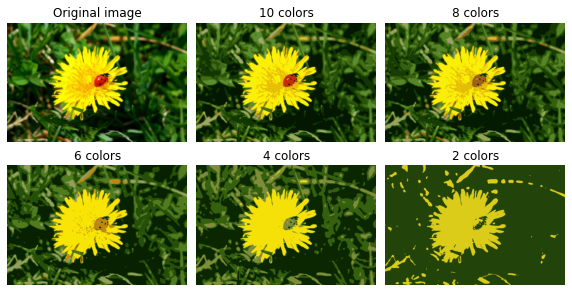

In [19]:
plt.figure(figsize = (10,5))
plt.subplots_adjust(wspace = 0.05, hspace = 0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
    
plt.show()

### 9.1.4 군집을 사용한 전처리
- 차원축소에 군집을 사용하는 예

In [20]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y = True)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state = 42)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_reg = LogisticRegression(multi_class = "ovr", solver = "lbfgs", max_iter = 5000, random_state = 42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# 테스트 세트에서 평가
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

In [26]:
# k-means를 이용하여 전처리 후 모델링
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = 50, random_state = 42)),
    ("log_reg", LogisticRegression(multi_class= "ovr", solver = "lbfgs", max_iter = 5000, random_state = 42))
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [27]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.98

In [ ]:
# 더 좋은 k값을 찾기
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters = range(2,100)) # 2 ~ 100까지 오분류율을 최소로 하는 k를 찾아보자
grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 2)
grid_clf.fit(X_train, y_train)

In [ ]:
grid_clf.best_params_

In [ ]:
grid_clf.score(X_test, y_test)

### 9.1.5 군집을 사용한 준지도 학습
- 레이블이 없는 데이터가 많고 레이블이 있는 데이터가 적을 때 사용

In [28]:
n_labeled = 50

In [29]:
# 50개의 라벨링된 데이터로 로지스틱 회귀를 시행
# 전체 데이터를 사용했을 때보다 성능이 좋지 않음
log_reg = LogisticRegression(multi_class = "ovr", solver = "lbfgs", random_state = 42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [30]:
k = 50
kmeans = KMeans(n_clusters = k, random_state = 42)
X_digits_dist = kmeans.fit_transform(X_train) # 각 센트로이드와의 거리 산출
representative_digit_idx = np.argmin(X_digits_dist, axis = 0) # 가장 가까운 이미지의 idx
X_representative_digits = X_train[representative_digit_idx] # 가장 가까운 이미지 = 대표 이미지 

In [31]:
X_digits_dist.shape

(1347, 50)

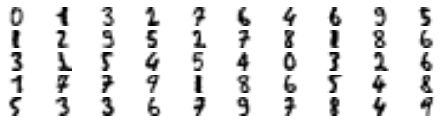

In [32]:
# 대표 이미지 출력 및 레이블링(수동)
plt.figure(figsize = (8,2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8,8), cmap = "binary", interpolation = "bilinear")
    plt.axis("off")
    
plt.show()

In [33]:
y_train[representative_digit_idx]

array([0, 1, 3, 2, 7, 6, 4, 6, 9, 5, 1, 2, 9, 5, 2, 7, 8, 1, 8, 6, 3, 1,
       5, 4, 5, 4, 0, 3, 2, 6, 1, 7, 7, 9, 1, 8, 6, 5, 4, 8, 5, 3, 3, 6,
       7, 9, 7, 8, 4, 9])

In [34]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [35]:
# 대표 이미지 50개를 가지고 로지스틱 회귀 분석
# 일반 이미지 50개를 사용한 것보다 대표 이미지 50개를 사용했을 때 성능이 더 좋음.
log_reg = LogisticRegression(multi_class = "ovr", solver = "lbfgs", max_iter = 5000, random_state = 42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9244444444444444

In [36]:
# 이 레이블을 같은 클러스터에 있는 다른 샘플에 전파
y_train_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [37]:
log_reg = LogisticRegression(multi_class = "ovr", solver = "lbfgs", max_iter = 5000, random_state = 42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# 성능이 더 올라갔다.
log_reg.score(X_test, y_test)

0.9377777777777778

In [39]:
# 클러스터 내의 전체 데이터 말고 가까운 50번째 백분위수까지만 레이블을 전파한다.
# 전체 데이터에 대해 전파할 경우 이상치가 섞일 가능성이 있기 때문에

percentile_closest = 70

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i) # return T, F
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1 # 클러스에 속하고 cutoff를 넘어가는 데이터를 -1로 표시

In [40]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [41]:
log_reg = LogisticRegression(multi_class = "ovr", solver = "lbfgs", max_iter = 5000, random_state = 42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# 성능은 낮아졌다 - 데이터에 따라 달라짐
log_reg.score(X_test, y_test)

0.9311111111111111

### 

In [43]:
# 실제값과 좀 다르다.
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9743589743589743

- 능동 학습(active learning)
    1. 지금까지 수집한 레이블된 샘플에서 모델을 훈련한다. 이 모델을 사용해 레이블되지 않은 모든 샘플에 대한 예측을 만든다.
    2. 모델이 가장 불확실하게 예측한 샘플을 전문가에게 보내 레이블을 붙인다.
    3. 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때까지 이를 반복한다.
    
    - 다른 전략은 모델을 가장 크게 바꾸는 샘플이나, 모델의 검증 점수를 가장 크게 떨어뜨리는 샘플, 여러 개의 모델이 동일한 예측을 내지 않는 샘플에 대해 레이블을 요청한다.

### 9.1.6 DBSCAN
- 알고리즘이 각 샘플에서 작은 거리인 $\epsilon$ 내에 샘플이 몇 개 놓여 있는지 센다. 이 지역을 샘플의 $\epsilon$이웃이라고 부른다.
- $\epsilon$-이웃 내에 적어도 min_samples개 샘플이 있다면 이를 핵심 샘플로 간주한다. 즉, 핵심 샘플은 밀집된 지역에 있는 샘플이다.
- 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속한다. 이웃에는 다른 핵심 샘플이 포함될 수 있다. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하ㅏ의 클러스터를 형성한다.
- 핵심 샘플도 아니고 이웃도 아닌 샘플은 이상치로 판단한다.
- 모든 클러스터가 충분히 밀집되어 있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능을 낸다.

In [82]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 1000, noise = 0.05, random_state = 42)

In [45]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [46]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [47]:
len(dbscan.core_sample_indices_)

808

In [48]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [49]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [50]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [51]:
dbscan2 = DBSCAN(eps = 0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [52]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels = True):
    core_mask = np.zeros_like(dbscan.labels_, dtype = bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)
    
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired") #경계부
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
  
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


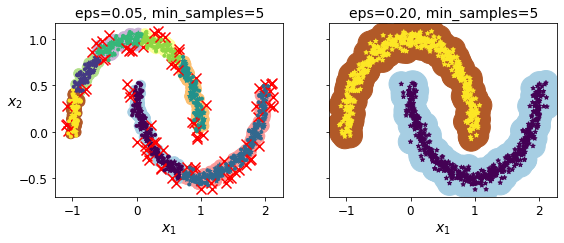

In [53]:
plt.figure(figsize = (9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size = 100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size = 600, show_ylabels = False)

plt.show()

- 이 알고리즘은 새로운 샘플에 대해 클러스터를 예측할 수 없다. 

In [54]:
dbscan = dbscan2

In [55]:
# k-nn을 이용하여 새로운 데이터를 예측해보자
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [56]:
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [57]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

In [58]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

### 9.1.7 다른 군집 알고리즘

##### 스펙트럼 군집

In [83]:
from sklearn.cluster import SpectralClustering

In [84]:
sc1 = SpectralClustering(n_clusters = 2, gamma = 100, random_state = 42)
sc1.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=100,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=42)

In [85]:
sc2 = SpectralClustering(n_clusters = 2, gamma = 1, random_state = 42)
sc2.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=42)

In [86]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [87]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

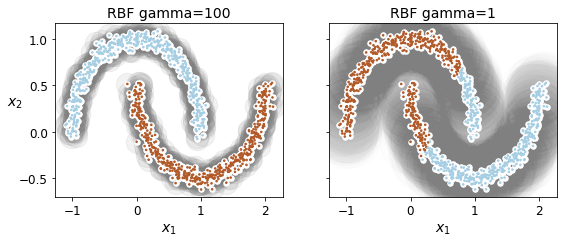

In [88]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

##### 병합 군집

In [59]:
from sklearn.cluster import AgglomerativeClustering

In [63]:
X = np.array([0,2,5,5.5]).reshape(-1,1)
agg = AgglomerativeClustering(linkage = "complete").fit(X)

In [64]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
           if attrib.endswith("_") and not attrib.startswith("_")]

In [65]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_components_',
 'n_connected_components_',
 'n_leaves_']

In [66]:
agg.children_

array([[2, 3],
       [0, 1],
       [4, 5]])

In [67]:
agg.labels_

array([0, 0, 1, 1], dtype=int64)

### 9.2 가우시안 혼합

In [6]:
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples = 1000, centers = ((4,-4), (0,0)), random_state = 42)
X1 = X1.dot(np.array([[0.374,0.95],[0.732,0.598]]))
X2, y2 = make_blobs(n_samples = 250, centers = 1, random_state = 42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [7]:
from sklearn.mixture import GaussianMixture

In [8]:
gm = GaussianMixture(n_components = 3, n_init = 10, random_state = 42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [9]:
gm.weights_

array([0.39032584, 0.20961444, 0.40005972])

In [10]:
gm.means_

array([[ 0.05145113,  0.07534576],
       [ 3.39947665,  1.05931088],
       [-1.40764129,  1.42712848]])

In [11]:
gm.covariances_

array([[[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]]])

In [12]:
gm.converged_

True

In [13]:
gm.n_iter_

4

In [14]:
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [15]:
gm.predict_proba(X)

array([[9.76815996e-01, 2.31833274e-02, 6.76282339e-07],
       [9.82914418e-01, 1.64110061e-02, 6.74575575e-04],
       [7.52377580e-05, 1.99781831e-06, 9.99922764e-01],
       ...,
       [4.31902443e-07, 9.99999568e-01, 2.12540639e-26],
       [5.20915318e-16, 1.00000000e+00, 1.45002917e-41],
       [2.30971331e-15, 1.00000000e+00, 7.93266114e-41]])

In [16]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86951041, -0.32742378],
       [ 0.29854504,  0.28307991],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [-1.04030781,  0.78655831]])

In [17]:
y_new

array([0, 0, 1, 1, 1, 2])

In [18]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

In [19]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225095

In [20]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

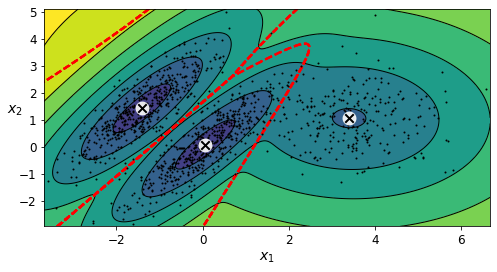

In [24]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

In [25]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [26]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

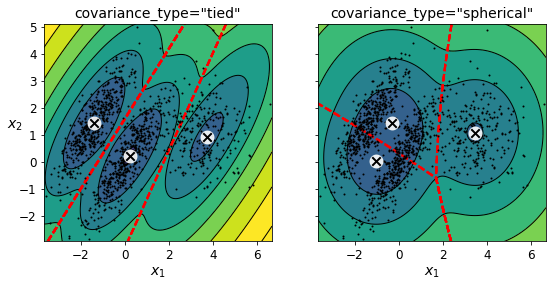

In [27]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

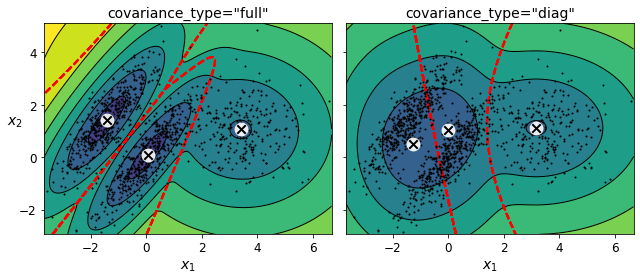

In [28]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

### 9.2.1 가우시안 혼합을 이용한 이상치 탐지
- 이상치 탐지(outlier detection) : 보통과 많이 다른 샘플을 감지하는 작업


In [32]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

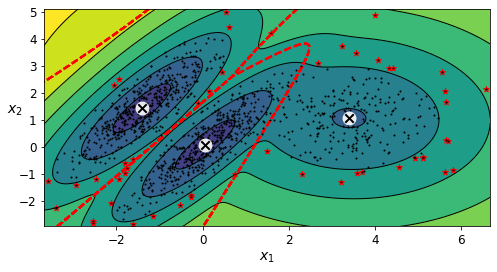

In [33]:
plt.figure(figsize = (8,4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:,0], anomalies[:,1], color = "r", marker = '*')
plt.ylim(top = 5.1)

plt.show()

### 9.2.2 클러스터 개수 선택하기
- BIC(bayesian information critertion)
- AIC(Akaike information criterion)

과 같은 이론적 정보 기준을 최소화하느 모델을 찾는다.



In [34]:
gm.bic(X)

8189.733705221635

In [35]:
gm.aic(X)

8102.508425106597

In [36]:
# 여러 가지 k값에 대한 가우시안 혼합 모델을 훈련하고 AIC, BIC를 측정
gms_per_k = [GaussianMixture(n_components = k, n_init = 10, random_state = 42).fit(X)
            for k in range(1, 11)]

In [37]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

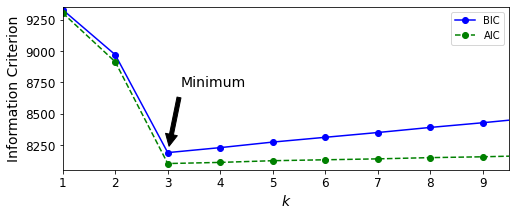

In [38]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [39]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [40]:
best_k

3

### 9.2.3 베이즈 가우시안 혼합 모델
- 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만듬.
- 자동으로 불필요한 클러스터를 제거함.

In [41]:
from sklearn.mixture import BayesianGaussianMixture

In [42]:
bgm = BayesianGaussianMixture(n_components = 10, n_init = 10, random_state = 42)
bgm.fit(X)

C:\Users\82104\anaconda3\lib\site-packages\sklearn\mixture\_base.py:263: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [44]:
np.round(bgm.weights_, 2)

array([0.4 , 0.  , 0.  , 0.  , 0.39, 0.2 , 0.  , 0.  , 0.  , 0.  ])

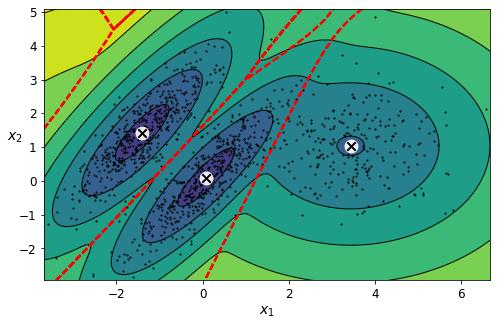

In [45]:
plt.figure(figsize = (8,5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [46]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=1000, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=1,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=10000,
                        weight_concentration_prior_type='dirichlet_process')

In [47]:
np.round(bgm_low.weights_, 2)

array([0.49, 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [48]:
np.round(bgm_high.weights_, 2)

array([0.43, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01, 0.37, 0.01, 0.01])

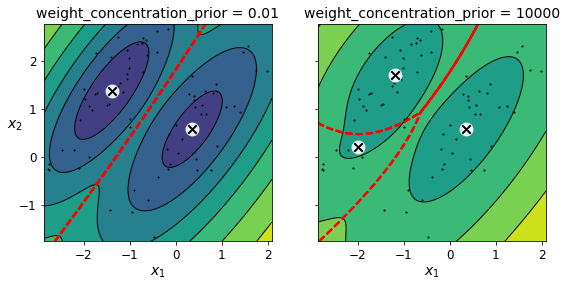

In [49]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

plt.show()

In [51]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples = 1000, noise = 0.05, random_state = 42)

In [52]:
bgm = BayesianGaussianMixture(n_components = 10, n_init = 10, random_state = 42)
bgm.fit(X_moons)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

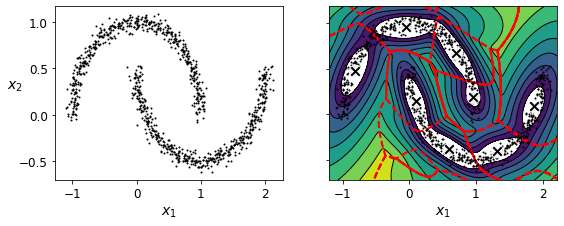

In [53]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)
 
plt.show()

## 9.3 연습문제

### 1 
- 군집을 어떻게 정의할 수 있나요? 몇 개의 군집 알고리즘을 말해보세요.
    - 머신러닝에서 군집은 비슷한 샘플을 모으는 비지도 작업이다.
    - 유사도 개념은 주어진 문제에 따라 다르다. 예를 들어 어떤 경우에는 가까이 있는 두 샘플을 비슷하다고 생각할 수 있지만 다른 경우에는 조밀학 모여 있는 ㅈ그룹에 같이 속해 있는 한 멀리 떨어진 샘플도 비슷하다고 볼 수 있다.
    - k-means, DBSCAN, 병합 군집, BIRCH, 평균-이동, 유사도 전파, 스펙트럼 군집이 인기가 많은 군집 알고리즘이다.

### 2
- 군집 알고리즘의주요 애플리케이션은 무엇인가요?
    - 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소, 이상치 탐지, 특이치 탐지 등
   

### 3
- k-means을 사용할 때 적절한 클러스터 개수를 선택할 수 있는 두 가지 기법을 설명하세요.
    1. 엘보 규칙: 클러스터 개수의 함수로 이너셔(각 샘플과 인접한 센트로이드 사이의 평균 제곱 거리)와 그래프에서 이너셔가 더는 빠르게 감소하지 않는 지점(엘보)를 찾는다.일반적으로 그 지점이 최적의 클러스터 개수에 가깝다
    2. 실루엣 점수 : 모든 샘플에 대한 평균 실루엣 계수. 샘플이 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와 멀리 떨어져 있으면 +1에 가깝고 다른 클러스터에 매우 인접해 있으면 -1에 가까워진다. 실루엣 다이어그램을 그려 좀 더 많은 분석을 수행할 수 있다.

### 4
- 레이블 전파는 무엇인가요? 왜 이를 구현해야 하고 어떻게 구현할 수 있나요?
    - 레이블 전파란 레이블이 있는 샘플의 일부(전부)를 레이블이 없는 비슷한 샘플에 복사하는 기법.
    - 레이블을 가진 샘플의 개수를 크게 늘릴 수 잇고 지도 학습 방법을 사용해 더 나은 성능을 낼 수 있다.(준지도 학습 방법)
    - 이를 구현하는 방법으로는 k-means와 같은 군집 알고리즘을 모든 샘플에 적용한 다음, 군집마다 가장 많은 레이블이나 가장 대표적인 샘플을 찾아 동일 클러스터 안에 있는 레이블이 없는 샘플에 전파

### 5 
- 대규모 데이터셋으로 확장할 수 있는 군집 알고리즘 두 개를 말해보세요. 밀도가 높은 지역을 찾는 군집 알고리즘 두 개는 무엇인가요?
    - K-mean, BIRCH : 대규모 데이터셋
    - DBSCAN, 평균-이동 : 밀도가 높은 지역

### 6 
- 능동 학습이 유용한 경우는 언제인가요? 어떻게 구현할 수 있나요?
    - 레이블이 없는 샘플이 많고 레이블을 부여하는 것에 비용이 많이 들 때는 능동 학습이 유용하다.
    - 이런 경우 무작위로 샘플을 선택해 레이블을 부여하는 것보다 능동 학습이 더 바람직하다. 전문가가 학습 알고리즘과 상호작용하여 알고리즘이 요청하는 특정 샘플에 레이블을 제공함.
    - 널리 사용하는 것은 불확실성 샘플링이다.

### 7 
- 이상치 탐지와 정상치 탐지의 차이는 무엇인가요?
    - 이상치 탐지 : 이상치가 포함될 수 있는 데이터셋에서 알고리즘을 훈련한다. 이상치 탐지의 목표는 전형적으로 이상치와 새로운 샘플 사이에 잇는 이상치를 구별해 내는 것.
    - 특이치 탐지 : 깨끗하다고 가정한 데이터셋에서 알고리즘을 훈련한다. 이 알고리즘의 목적은 새로운 샘플 사이에서 특이한 것을 감지하는 것.
    - 어떤 알고리즘(아이솔레이션 포레스트)는 이상치 탐지에 최적인 반면, 다른 알고리즘(one-class SVM)은 특이치 탐지에 잘 맞다.

### 8 
- 가우시안 혼합이 무엇인가요? 어떤 작업에 사용할 수 있나요?
    - 가우시안 혼합 모델 : 샘플이 파라미터를 모르는 몇 개의 가우시안 분포에서 생성되었다고 가정하는 확률 모델
    - 다른 말로 데이터가 유한한 개수의 타원모양 클러스터로 그룹지어 있다는 가정.
    - 하지만 샘플이 어떤 클러스터에 속해 있는지는 알지 못한다. 밀집도 추정, 군집, 이상치 탐지에 이 모델을 사용할 수 있다.

### 9 
- 가우시안 혼합 모델을 사용할 때 적절한 클러스터 개수를 찾는 두 가지 기법을 말해보세요.
    - BIC, AIC 그래프를 그리고, 이를 최소화하는 클러스터의 개수를 선택
    - 베이즈 가우시안 혼합 모델을 사용하여 클러스터 개수를 자동으로 선택하는 것.

### 10
- 훈련, 검증, 테스트 세트로 나눈다.
- 계층적 샘플링: 각 세트에 동일한 사람의 얼굴이 고루 섞이도록
- k-means 를 사용하여 이미지를 군집
- 적절한 클러스터의 개수 선택 및 시각화

In [54]:
# 데이터셋 불러오기
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\82104\scikit_learn_data


In [55]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [56]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [58]:
# 훈련, 검증, 테스트 세트로 나눈다.
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 40, random_state = 42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 80, random_state = 42)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [59]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [60]:
# 속도를 높이기 위해 PCA로 데이터의 차원을 줄인다.
from sklearn.decomposition import PCA

pca = PCA(0.99) #99% 설명력
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

200

In [62]:
# k-means 적용
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


#### 실루엣 분석
- silhouette_score() : 0 ~ 1 사이의 값을 가지며, 1에 가까울 수록 좋다.

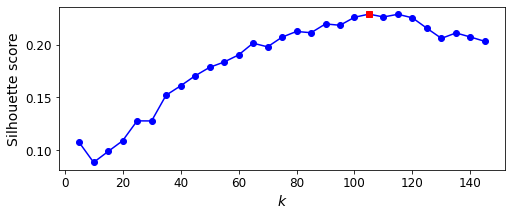

In [66]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                    for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [67]:
best_k

105

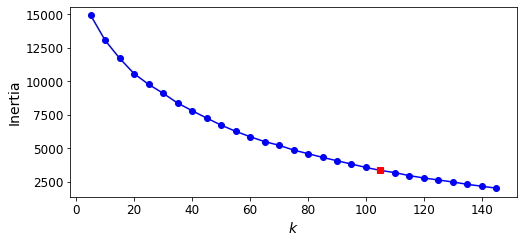

In [68]:
# 이니셔 : 엘보우 지점이 없음. 그냥 위의 k값을 사용
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [69]:
best_model = kmeans_per_k[best_index]

Cluster 0


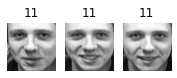

Cluster 1


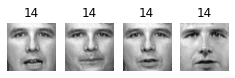

Cluster 2


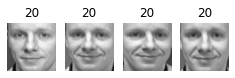

Cluster 3


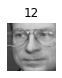

Cluster 4


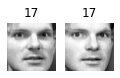

Cluster 5


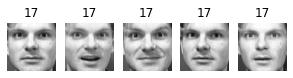

Cluster 6


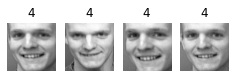

Cluster 7


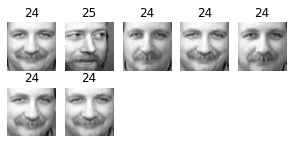

Cluster 8


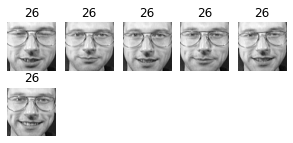

Cluster 9


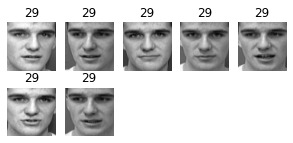

Cluster 10


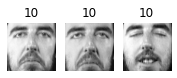

Cluster 11


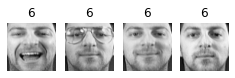

Cluster 12


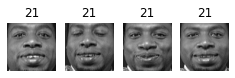

Cluster 13


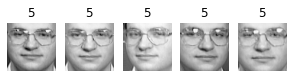

Cluster 14


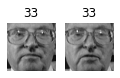

Cluster 15


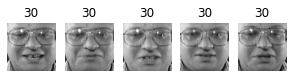

Cluster 16


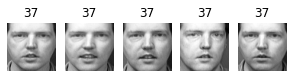

Cluster 17


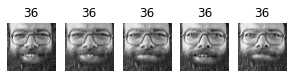

Cluster 18


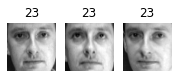

Cluster 19


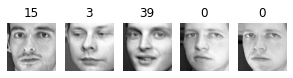

Cluster 20


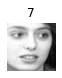

Cluster 21


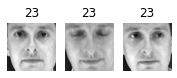

Cluster 22


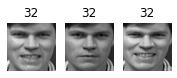

Cluster 23


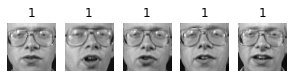

Cluster 24


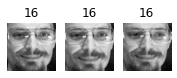

Cluster 25


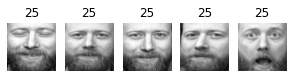

Cluster 26


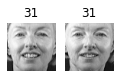

Cluster 27


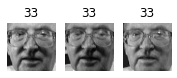

Cluster 28


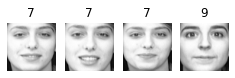

Cluster 29


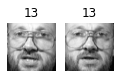

Cluster 30


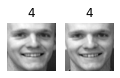

Cluster 31


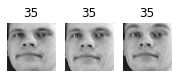

Cluster 32


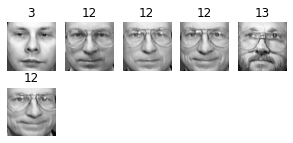

Cluster 33


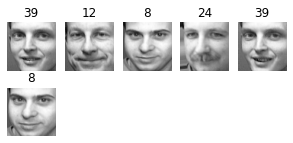

Cluster 34


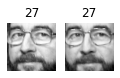

Cluster 35


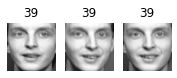

Cluster 36


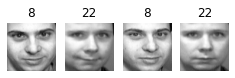

Cluster 37


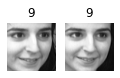

Cluster 38


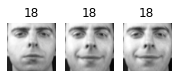

Cluster 39


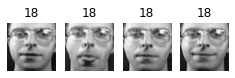

Cluster 40


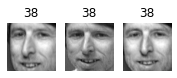

Cluster 41


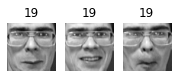

Cluster 42


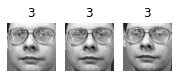

Cluster 43


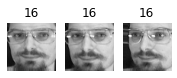

Cluster 44


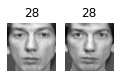

Cluster 45


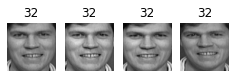

Cluster 46


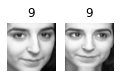

Cluster 47


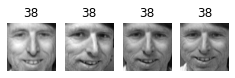

Cluster 48


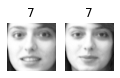

Cluster 49


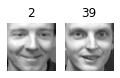

Cluster 50


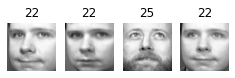

Cluster 51


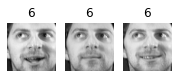

Cluster 52


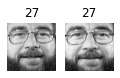

Cluster 53


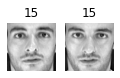

Cluster 54


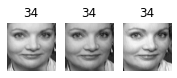

Cluster 55


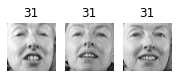

Cluster 56


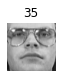

Cluster 57


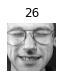

Cluster 58


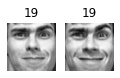

Cluster 59


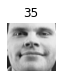

Cluster 60


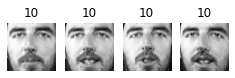

Cluster 61


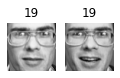

Cluster 62


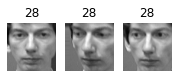

Cluster 63


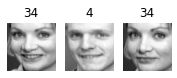

Cluster 64


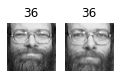

Cluster 65


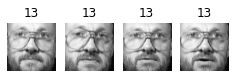

Cluster 66


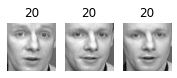

Cluster 67


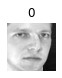

Cluster 68


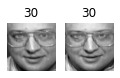

Cluster 69


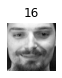

Cluster 70


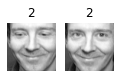

Cluster 71


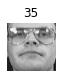

Cluster 72


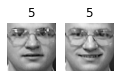

Cluster 73


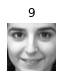

Cluster 74


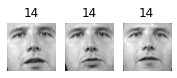

Cluster 75


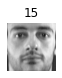

Cluster 76


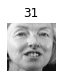

Cluster 77


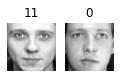

Cluster 78


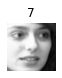

Cluster 79


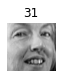

Cluster 80


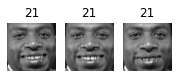

Cluster 81


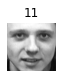

Cluster 82


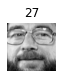

Cluster 83


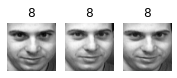

Cluster 84


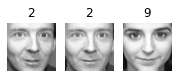

Cluster 85


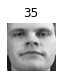

Cluster 86


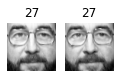

Cluster 87


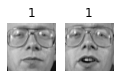

Cluster 88


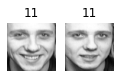

Cluster 89


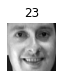

Cluster 90


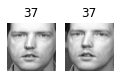

Cluster 91


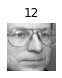

Cluster 92


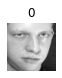

Cluster 93


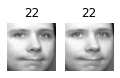

Cluster 94


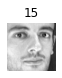

Cluster 95


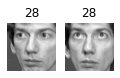

Cluster 96


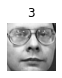

Cluster 97


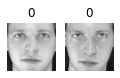

Cluster 98


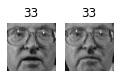

Cluster 99


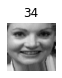

Cluster 100


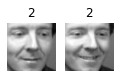

Cluster 101


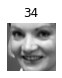

Cluster 102


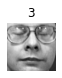

Cluster 103


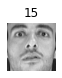

Cluster 104


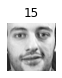

In [70]:
# 시각화
def plot_faces(faces, labels, n_cols = 5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize = (n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap = "gray")
        plt.axis("off")
        plt.title(label)
    plt.show()
    
for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_ == cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)
    
# 군집된 이미지는 부정확해서 모델을 훈련할 때 바로 사용하기 어렵다.
# 하지만, 새로운 데이터셋에 이미지를 레이블링할 때는 매우 유용할 수 있다.

### 11
- k-means를 이용하여 차원 축소 후 분류기 훈련.
- 분류기 성능을 최대로 만드는 클러스터의 개수
- 축소된 세트에서 추출한 특성을 원본 세트에 추가 (최선의 클러스터의 개수 찾기)

In [72]:
from sklearn.ensemble import RandomForestClassifier

# 원본 데이터를 활용한 분류기
clf = RandomForestClassifier(n_estimators = 150, random_state = 42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.9

In [76]:
# k-means를 적용하여 분류기를 적용
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced  = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators = 150, random_state = 42)
clf.fit(X_train_reduced, y_train)

clf.score(X_valid_reduced, y_valid)

# 성능이 낮아짐.

0.75

In [77]:
# 분류기 성능을 최대로 만드는 클러스터의 개수를 찾기
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters = n_clusters, random_state = 42)),
        ("forest_clf", RandomForestClassifier(n_estimators = 150, random_state = 42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))
    
# 정확도를 80%를 넘지 못한다.
# 클러스터 센트로이드까지의 거리는 원본이미지만큼 유용하지 않은 듯 하다. 

5 0.4625
10 0.4125
15 0.5125
20 0.5375
25 0.6
30 0.6625
35 0.7125
40 0.6875
45 0.7
50 0.675
55 0.6875
60 0.7125
65 0.7125
70 0.7125
75 0.675
80 0.7375
85 0.7125
90 0.7375
95 0.7125
100 0.725
105 0.75
110 0.725
115 0.7125
120 0.725
125 0.7375
130 0.7
135 0.725
140 0.7125
145 0.725


In [78]:
# 축소된 세트에서 추출한 특성을 원본 특성에 추가 후 분류기 훈련
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended  = np.c_[X_test_pca,  X_test_reduced]

In [79]:
clf = RandomForestClassifier(n_estimators = 150, random_state = 42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

# 별 효과가 없다. 이 경우 클러스터는 분류기를 직접 훈련하는데 도움이 되지 않는다.

0.7625

### 12
- 가우시안 혼합 모델을 훈련 (알고리즘의 속도를 높이기 위해 데이터셋의 차원을 감소시켜야 한다.)
- 이 모델을 이용하여 새로운 얼굴을 생성하고 시각화
- 일부 이미지를 수정, 모델이 이상치를 감지하는지 확인

In [80]:
# pca를 적용한 데이터에 가우시안 혼합 모델을 적용
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 40, random_state = 42)
y_pred = gm.fit_predict(X_train_pca)

In [81]:
# 새로운 얼굴을 시각화
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples = n_gen_faces) # sample()
gen_faces = pca.inverse_transform(gen_faces_reduced) #inverse_transform() : pca 재구성

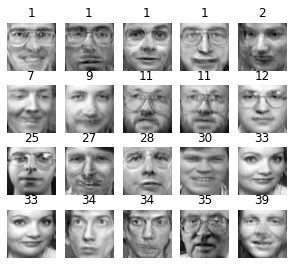

In [82]:
plot_faces(gen_faces, y_gen_faces)

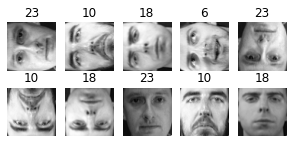

In [84]:
# 일부 이미지 수정 후, 모델이 이상치를 감지하는지 확인

# 회전
n_rotated = 4 
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64,64), axes = [0,2,1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

# 뒤집기
n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:,::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

# 어둡게
n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [85]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [86]:
gm.score_samples(X_bad_faces_pca)

array([-5.00461372e+07, -3.43436759e+07, -3.46924271e+07, -4.30346232e+07,
       -3.21480651e+07, -4.40347818e+07, -3.77419255e+07, -1.17149380e+08,
       -8.20052298e+07, -8.38610991e+07])

In [87]:
gm.score_samples(X_train_pca[:10])

array([1177.02984407, 1139.43961124, 1116.17012507, 1176.6645346 ,
       1096.60379547, 1146.18455775, 1146.03684169, 1096.60384366,
       1168.65018044, 1116.17012267])

### 13
- pca를 적용 후 , 재구성을 하고 재구성 오차를 쟀을 때 재구성 오차가 크면 이상치일 확률이 크다.

In [88]:
X_train_pca

array([[ 2.2095602 ,  8.177865  , -3.1609123 , ...,  0.10565575,
         0.11277719, -0.12379589],
       [-2.8795319 , -5.852721  , -3.1102686 , ..., -0.19481394,
        -0.07905008,  0.09704518],
       [-3.7210045 , -3.7166855 , -1.6136078 , ...,  0.1077444 ,
         0.0685638 ,  0.02084196],
       ...,
       [ 0.02803438, -1.4935062 ,  2.3138235 , ...,  0.1283842 ,
        -0.06185969,  0.01100612],
       [-2.0366485 , -2.057368  ,  1.7076212 , ..., -0.11621464,
        -0.04620298,  0.02862727],
       [ 4.3340673 ,  0.7842253 , -1.6855742 , ...,  0.14180604,
        -0.18895902, -0.02666708]], dtype=float32)

In [89]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis = -1)
    return mse

In [90]:
reconstruction_errors(pca, X_train).mean()

0.00018892145

In [91]:
reconstruction_errors(pca, X_bad_faces).mean()

0.006214901

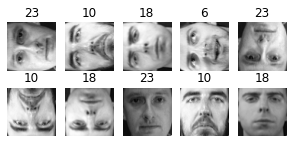

In [92]:
plot_faces(X_bad_faces, y_bad)

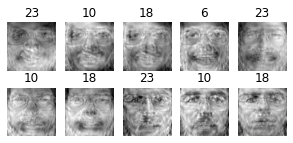

In [95]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)